현대 소프트웨어 애플리케이션의 기본사항 중 하나는 성능이다. 높은 성능의 컴퓨팅 시스템을 통해 작업을 물론 여가활동에 이르기까지 다양한 방법으로 상호작용을 한다.

이를테면 상호작용은 웹에 있는 여행 사이트에서 항공권을 예약하는 것이다. 수백 개의 트랜잭션을 같은 시간에 수행하는 고성능 시스템과 상호작용하는 것이다. 인터넷 뱅킹을 통해 누군가에게 송금하거나 온라인으로 신용카드 청구서를 지불하는 경우, 고성능 트랜잭션 시스템과 상호작용을 하는 것이다. 또란 휴대폰에서 온라인 게임을 하고 다른 플레이어와 상호작용을 하는 상황이라면, 수천 명의 플레이어로부터 입력을 수신하면서도 합리적이고 효율적인 계산을 하는 서버 네트워크가 있을 것이다. 이 서버 네트워크는 데이터를 전송하는 높은 동시성과 낮은 지연률을 갖는다.

현대의 웹 애플리케이션은 고속 인터넷의 출현과 하드웨어 비용/성능 비율의 대폭적인 하락으로 인해 수백 만의 사용자를 동시에 지원할 수 있다. 성능은 현대적인 소프트웨어 아키텍처의 핵심 품질속성으로 높은 확장성을 갖는 소프트웨어의 작성은 여전히 어려운 영역이다. 기능과 다른 품질속성들을 모두 만족하는 애플리케이션을 만들어도 성능 테스트에 실패하면 애플리케이션은 양산될 수 없다.

이번에는 다음을 다룬다.

* 성능의 정의
* 소프트웨어 성능 엔지니어링
* 성능 테스팅 도구의 유형
* 성능 복잡도와 Big-O 표기법
    
    * 성능 측정
    * 그래프를 사용해 성능 복잡도 발견하기
    * 성능 개선

* 프로파일링
    
    * 결정론적 프로파일링
    * cProfile과 profile
    * 서드 파티 프로파일러

* 기타 도구들
    
    * Obigraph
    * Pympler

* 성능을 위한 프로그래밍 - 데이터 구조
    
    * 리스트
    * 딕셔너리
    * 세트
    * 튜플
    
* 고성능 컨테이너 - 컬렉션 모듈
    
    * deque
    * defaultdict
    * OrderedDict
    * Counter
    * ChainMap
    * namedtuple
* 확률론적 데이터 구조 - 블룸 필터   

## 성능이란 무엇인가?

초당 트랜잭션 개수나 주어진 시간 측면의 단일 트랜잭션 처리량 또는 대기 시간에 요구사항을 만족시킬 수 있는 시스템의 척도

성능은 응답 시간/대기 시간이나 처리량 측면에서 측정할 수 있다.
응답 시간/대기 시간은 애플리케이션이 요청/응답 루프를 완료하는 데 걸리는 평균 시간이다.
처리량은 시스템이 성공적으로 처리하는 분당 요청 개수나 트랜잭션 관점에서 성공적으로 완료된 입력의 처리 비율이다.

올바른 성능 엔지니어링은 하드웨어에 최적의 방식으로 소프트웨어가 조정되는 것을 추구한다. 사용 가능한 하드웨어에 따라 소프트웨어가 선형적으로 확장되거나 더 잘 확장되게 해야 한다.

## 소프트웨어 성능 엔지니어링

소프트웨어 성능 엔지니어링은 소프트웨어 개발 수명주기(SDLC) 동안 적용되는 소프트웨어 엔지니어링 및 분석에 관련된 모든 활동을 포함하며, 성능 요구사항의 만족을 목표로 한다.

기존 소프트웨어 엔지니어링에서 성능 테스팅 및 피드백은 SDLC의 마지막 시점에 수행된다. 이러한 방법은 순전히 측정 기반으로 시스템을 테스트하고 진단하기 전에 시스템이 개발되기를 기다리며, 결과에 기반해 시스템을 조정한다.

더 형식적인 다른 모델은 소프트웨어 성능 엔지니어링(SPE)으로 SDLC 초기에 성능 모델을 개발한다. 

## 성능 테스팅과 측정 도구

성능 테스팅과 측정 도구들은 커다란 두 개의 범주로 나누어진다. 한 범주의 도구는 성능 테스팅과 진단에 사용되고, 다른 범주의 도구는 성능 메트릭 수집과 계측에 사용된다. 

## 성능 측정

가장 간단한 시간 측정 방법 중 하나는 POSIX/Linux 시스템의 time 명령어를 사용해 시간을 측정하는 것이다.

real, user, sys의 세 가지 시간 출력이 표시됨을 확인할 수 있다. 세 가지의 구별은 중요하므로 간단히 살펴보자.

* real: 실제 동작에 소요된 벽시계 시간이다. 동작의 시작부터 끝날 때까지의 시간이다.
* user: 사용자 모드(커벌 외부)에서 프로세스에 소비된 실제 CPU 시간이다. 모든 대기 시간과 I/O 같이 대기에 사용된 시간은 포함되지 않는다.
* sys: 시스템 시간은 프로그램이 커널 안의 시스템 호출 실행에 사용한 CPU 시간의 총량이다. sys는 권한이 부여된 시스템 호출 같이, 커널 영역에서 실행되는 함수만 대상으로 계산한다. 

### 컨텍스트 관리자를 사용한 시간 측정

파이썬에서 실행 시간을 측정하려는 코드 블록의 컨텍스트 관리자 역할을 하는 함수를 작성하기는 그리 어렵지 않다. 우선 성능을 측정할 수 있는 프로그램이 필요하다.

시간 특정을 위해 컨텍스트 관리자의 사용 방법을 배우려면, 다음 단계를 따라야 한다.

1. 테스트 프로그램으로 두 시퀀스 가의 공통 요소를 계산하는 프로그램을 작성해보자.




In [2]:
def common_items(seq1, seq2):
    common = []
    for item in seq1:
        if item in seq2:
            common.append(item)
    return common

2. 코드의 시간을 알려주는 간단한 컨텍스트 매니저 타이머를 작성해보자. 시간 측정을 위해 time 모듈의 perf_counter를 사용한다.

In [3]:
from time import perf_counter as timer_func
from contextlib import contextmanager

@contextmanager
def timer():
    """ A simple timing function for routines """
    
    try:
        start = timer_func()
        yield
    except Exception as e:
        print(e)
    finally:
        end = timer_func()
        print('Time spent=>', 1000.0*(end-start),'ms.')

3. 간다한 입력 데이터의 함수 시간을 측정한다. 입력 크기가 주어지면 임의의 데이터를 생성하는 테스트 함수를 사용하는 것이 좋다

In [4]:
import random
def test(n):
    """ Generate test data for numerical lists given input size 
    """
    a1 = random.sample(range(0, 2*n), n)
    a2 = random.sample(range(0, 2*n), n)
    return a1, a2

In [8]:
with timer() as t:
    common = common_items(*test(100))

Time spent=> 0.5088949983473867 ms.


4. 쉬운 테스팅과 다양한 크기의 입력 데이터 생성을 위해 테스트 데이터 생서과 테스트를 같은 함수로 결합할 수 있다.

In [12]:
def test(n, func):
    a1=random.sample(range(0, 2*n), n)
    a2=random.sample(range(0, 2*n), n)
    with timer() as t:
        result = func(a1, a2)

In [13]:
test(100, common_items)

Time spent=> 0.17586499961907975 ms.


In [14]:
test(200, common_items)

Time spent=> 0.6811310013290495 ms.


In [15]:
test(1000, common_items)

Time spent=> 18.695459999435116 ms.


In [16]:
test(800, common_items)

Time spent=> 12.06185400224058 ms.


6. 타이머를 여러 번 실행하고 평균값을 선택해야 한다. 

파이썬은 타이밍 분석 수행에 도움이 되는 timeit 모듈을 표준 라이브러리로 제공한다.

### timeit 모듈을 사용한 타이밍 코드

프로그래머는 파이썬 표준 라이브러리의 timeit 모듈을 이용해 작은 크기의 코드 실행에 걸리는 시간을 측정할 수 있다. 대상 콛드는 파이썬 문장, 표현식, 함수가 될 수 있다.

timeit 모듈을 사용하는 가장 간단한 방법은 파이썬 명령행에서 모듈로 실행하는 것이다.

예를 들어 다음은 임의의 범위에 있는 숫자에 제곱 값을 계산하는 즉, 리스트 축약 성능을 측정하는 간단한 파이썬 인라인 코드의 타이밍 데이터다.

In [17]:
timeit [x*x for x in range(100)]

14.9 µs ± 119 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### timeit을 사용한 코드의 성능 측정

두 시퀀스 사이의 공통 항목을 테스트하기 위한 test 함수를 다시 작성한다.

In [24]:
def test():
    """ Testing the common_items function """
    common = common_items(a1, a2)

In [25]:
a1, a2 = [], []
def setup(n):
    global a1, a2
    a1 = random.sample(range(0, 2*n), n)
    a2 = random.sample(range(0, 2*n), n)

In [29]:
import timeit

t = timeit.Timer('test()', 'from common_items import test, setup; setup(100)')
1000000.0*t.timeit(number=10000)/10000

### 시간 복잡도 확인하기 - 그래프

In [30]:
import matplotlib.pyplot as plt

def plot(xdata, ydata):
    plt.plot(xdata, ydata)
    plt.show()

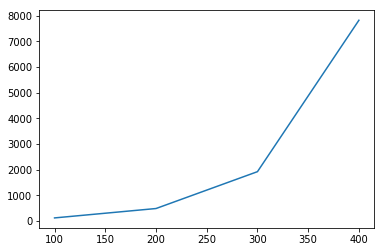

In [32]:
xdata = [100, 200, 300, 400]
ydata = [117, 483, 1920, 7823]
plot(xdata, ydata)

### 프로파일링

프로파일러를 설명하고 결정론적 프로파일링을 지원하는 파이썬 표준 라이브러리의 모듈을 살펴본다. line_profiler와 memory_profiler 같은 프로파일링을 지원하는 서드 파티 라이브러리로 살펴본다.

### 결정론적 프로파일링

결정론적 프로파일링은 모든 함수의 호출과 함수의 반환 값, 예외 이벤트가 모니터링되고 이러한 이벤트들 사이의 간격이 정확하게 측정됨을 의미한다. 또 다른 유형의 프로파일링, 즉 통계적인 프로파일링은 명령어 포인터를 무작위로 샘플링하고 명령어 실행에 소비되는 시간을 추론하다.

파이썬은 해석형 언어이므로 인터프리터가 메타데이터를 유지할 때 일정한 오버헤드가 존재한다. 결정론적 프로파일링 도구 대부분은 메타데이터 정보를 이용하므로 애플리케이션에 추가적인 처리를 위한 아주 적은 오버헤드만 추가한다. 파이썬에서 결정론적 프로파일링은 비용이 많이 드는 동작이 아니다.

### cProfile과 profile을 사용한 프로파일링

